<a href="https://colab.research.google.com/github/WoradeeKongthong/ComputerVision/blob/master/cat_or_not_image_binary_classification_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import h5py
import numpy as np

# Load dataset

In [15]:
train_dataset = h5py.File('train_catvnoncat.h5', 'r')
test_dataset = h5py.File('test_catvnoncat.h5', 'r')

In [3]:
type(train_dataset)

h5py._hl.files.File

In [16]:
print(list(train_dataset.keys()))
print(list(test_dataset.keys()))

['list_classes', 'train_set_x', 'train_set_y']
['list_classes', 'test_set_x', 'test_set_y']


In [18]:
trainX = np.array(train_dataset['train_set_x'])
trainy = np.array(train_dataset['train_set_y'])
testX = np.array(test_dataset['test_set_x'])
testy = np.array(test_dataset['test_set_y'])

In [19]:
# summary dataset shape
print('trainX shape : ', trainX.shape)
print('trainy shape : ', trainy.shape)
print('testX shape : ', testX.shape)
print('testy shape : ', testy.shape)

trainX shape :  (209, 64, 64, 3)
trainy shape :  (209,)
testX shape :  (50, 64, 64, 3)
testy shape :  (50,)


In [20]:
trainX[0].dtype

dtype('uint8')

In [26]:
from matplotlib import pyplot as plt
from random import randint

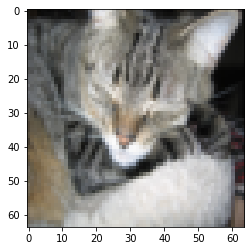

Cat or NonCat :  1


In [136]:
# print example image and label
sample = randint(0,len(trainX)-1)
plt.imshow(trainX[sample])
plt.show()
print('Cat or NonCat : ', trainy[sample])

# Create Data Generator

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
# create generator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow(trainX, trainy, batch_size=32)
test_it = datagen.flow(testX, testy, batch_size=32)

# Define Model : Transfer Learning with VGG16
VGG16 as an integrated feature extractor

In [40]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [41]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3))
  # mark loaded layers as not trainable
  for layer in model.layers :
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(fc1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [37]:
model = define_model()

58892288/58889256 [==============================] - 0s 0us/step


# Fit the model

In [54]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 1.8330 - accuracy: 0.8086 - val_loss: 2.5705 - val_accuracy: 0.8800
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.4477 - accuracy: 0.9617 - val_loss: 3.1629 - val_accuracy: 0.8800
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.0866 - accuracy: 0.9952 - val_loss: 2.9151 - val_accuracy: 0.9200
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.0669 - accuracy: 0.9952 - val_loss: 2.8885 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 2.9182 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.0054 - accuracy: 0.9952 - val_loss: 2.9140 - val_accuracy: 0.9200
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.9141 - val_accuracy: 0.9200
Epoch 8/10
7/7 [=======================

# Results : learning curve and model performance

In [61]:
# plot learning curve and print model performance
def summarize_model(history):
  # learning curve
  plt.figure(figsize=(8,8))

  # plot loss
  plt.subplot(211)
  plt.plot(history.history['loss'], color='green', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='validation')
  plt.title('Cross Entropy Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='validation')
  plt.title('Classification Accuracy')
  plt.legend()
  plt.show()
  
  # model performance
  _, train_acc = model.evaluate(train_it, steps=len(train_it), verbose=0)
  _, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
  print('Model Performance (accuracy)')
  print('Train : %.3f' %train_acc)
  print('Test :  %.3f' %test_acc)

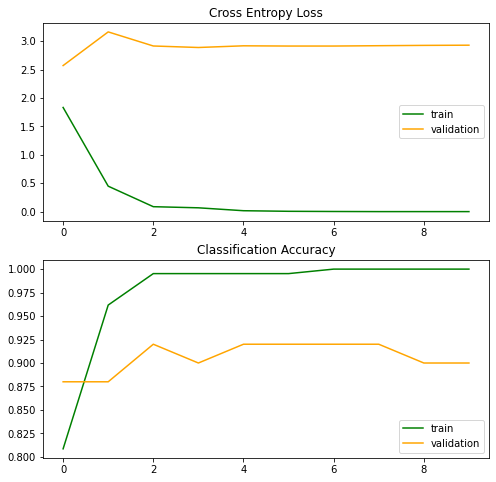

Model Performance (accuracy)
Train : 1.000
Test :  0.900


In [62]:
summarize_model(history)

# Develop Model : add Dropout layer

In [63]:
from keras.layers import Dropout

In [64]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3))
  # mark loaded layers as not trainable
  for layer in model.layers :
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 3.0481 - accuracy: 0.7177 - val_loss: 1.1750 - val_accuracy: 0.8800
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.5378 - accuracy: 0.9522 - val_loss: 1.2225 - val_accuracy: 0.9200
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.0961 - accuracy: 0.9952 - val_loss: 1.4856 - val_accuracy: 0.9200
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.0723 - accuracy: 0.9952 - val_loss: 1.6235 - val_accuracy: 0.9400
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.6961 - val_accuracy: 0.9400
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.0342 - accuracy: 0.9904 - val_loss: 1.5911 - val_accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.4898 - val_accuracy: 0.9400
Epoch 8/10
7/7 [========================

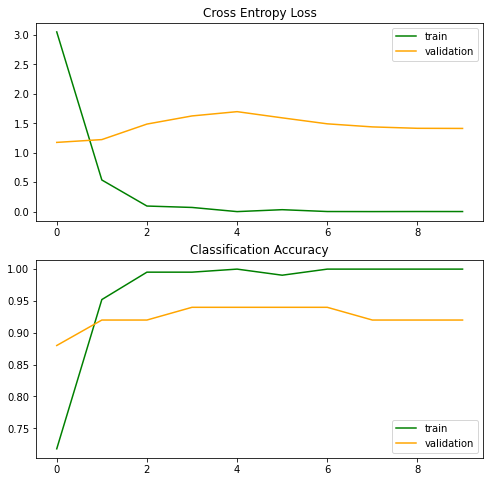

Model Performance (accuracy)
Train : 1.000
Test :  0.920


In [66]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10)
summarize_model(history)

# Develop Model : additional fully connected layer and dropout

In [74]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3))
  # mark loaded layers as not trainable
  for layer in model.layers :
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  fc2 = Dense(64, activation='relu', kernel_initializer='he_uniform')(dropout1)
  dropout2 = Dropout(0.2)(fc2)
  output = Dense(1, activation='sigmoid')(dropout2)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 2.8664 - accuracy: 0.7368 - val_loss: 2.1976 - val_accuracy: 0.8400
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6627 - accuracy: 0.9282 - val_loss: 1.1424 - val_accuracy: 0.9400
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.2622 - accuracy: 0.9617 - val_loss: 1.0842 - val_accuracy: 0.9400
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.1805 - accuracy: 0.9761 - val_loss: 1.1592 - val_accuracy: 0.9200
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0683 - accuracy: 0.9761 - val_loss: 1.1712 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 1.1501 - val_accuracy: 0.9000
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0130 - accuracy: 0.9952 - val_loss: 1.0840 - val_accuracy: 0.9400
Epoch 8/10
7/7 [========================

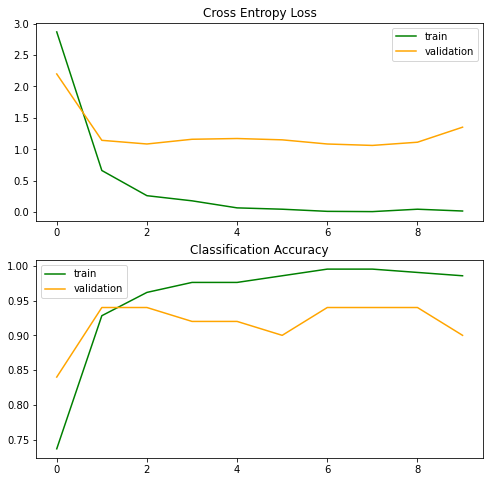

Model Performance (accuracy)
Train : 1.000
Test :  0.900


In [75]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10)
summarize_model(history)

Note : additional fully connected layer doesn't help on increasing performance

# Improve Model : change flatten to be global average pooling

In [76]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
  # mark loaded layers as not trainable
  for layer in model.layers :
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 2.7563 - accuracy: 0.6794 - val_loss: 1.8504 - val_accuracy: 0.8000
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.8082 - accuracy: 0.9330 - val_loss: 1.3879 - val_accuracy: 0.9200
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.4158 - accuracy: 0.9378 - val_loss: 1.5042 - val_accuracy: 0.9200
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.2303 - accuracy: 0.9665 - val_loss: 1.6923 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.1455 - accuracy: 0.9761 - val_loss: 1.7830 - val_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.0755 - accuracy: 0.9809 - val_loss: 1.8079 - val_accuracy: 0.9200
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0973 - accuracy: 0.9761 - val_loss: 1.7785 - val_accuracy: 0.9200
Epoch 8/10
7/7 [========================

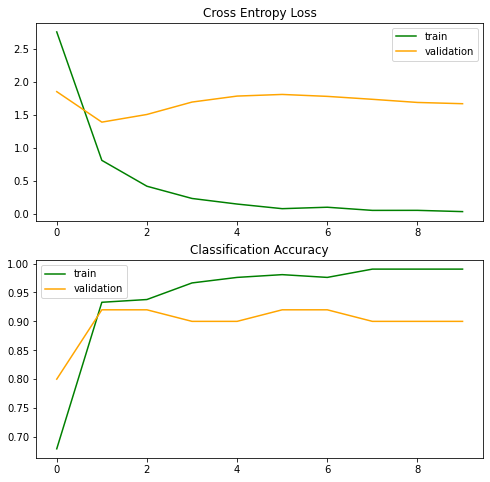

Model Performance (accuracy)
Train : 0.995
Test :  0.900


In [77]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10)
summarize_model(history)

# Develop Model : set last VGG-block as trainable

In [78]:
model=VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [83]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
  # mark loaded layers as not trainable
  for layer in model.layers[:-5] :
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 2.0550 - accuracy: 0.7608 - val_loss: 1.1299 - val_accuracy: 0.7600
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 0.4530 - accuracy: 0.8565 - val_loss: 0.6852 - val_accuracy: 0.8200
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.5026 - accuracy: 0.9378 - val_loss: 1.4663 - val_accuracy: 0.8400
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.3277 - accuracy: 0.9522 - val_loss: 0.4783 - val_accuracy: 0.9400
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.2862 - accuracy: 0.9856 - val_loss: 0.5424 - val_accuracy: 0.9200
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.0756 - accuracy: 0.9761 - val_loss: 0.1070 - val_accuracy: 0.9600
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.1185 - val_accuracy: 0.9600
Epoch 8/20
7/7 [==================

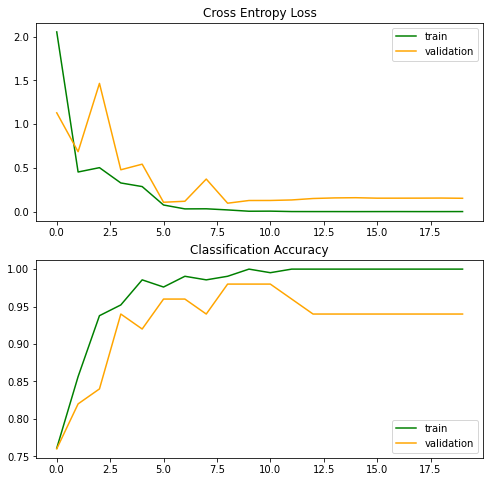

Model Performance (accuracy)
Train : 1.000
Test :  0.940


In [88]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20)
summarize_model(history)

# Develop Model : Data Augmentation

In [92]:
# create generator
datagen = ImageDataGenerator(featurewise_center=True, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, rotation_range=90)
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow(trainX, trainy, batch_size=32)
test_it = datagen.flow(testX, testy, batch_size=32)

In [93]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
  # mark loaded layers as not trainable
  for layer in model.layers[:-5] :
    layer.trainable = False
    
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 2.9324 - accuracy: 0.6268 - val_loss: 3.4679 - val_accuracy: 0.6600
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 1.2747 - accuracy: 0.7129 - val_loss: 0.4445 - val_accuracy: 0.7400
Epoch 3/20
7/7 [==============================] - 13s 2s/step - loss: 0.4013 - accuracy: 0.8900 - val_loss: 0.3368 - val_accuracy: 0.8800
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.3586 - accuracy: 0.9043 - val_loss: 0.2005 - val_accuracy: 0.9800
Epoch 5/20
7/7 [==============================] - 13s 2s/step - loss: 0.2157 - accuracy: 0.9139 - val_loss: 0.2138 - val_accuracy: 0.9400
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 0.3049 - accuracy: 0.9282 - val_loss: 0.2335 - val_accuracy: 0.8800
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.2775 - accuracy: 0.8900 - val_loss: 0.0914 - val_accuracy: 0.9800
Epoch 8/20
7/7 [==================

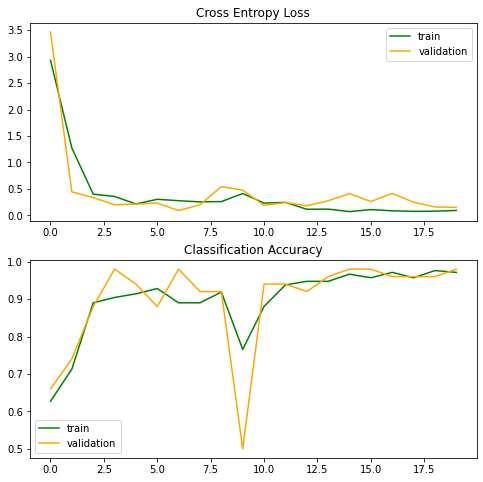

Model Performance (accuracy)
Train : 0.971
Test :  0.960


In [94]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20)
summarize_model(history)

# Develop Model : train more layers of VGG

In [95]:
# create generator
datagen = ImageDataGenerator(featurewise_center=True, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, rotation_range=90)
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow(trainX, trainy, batch_size=32)
test_it = datagen.flow(testX, testy, batch_size=32)

In [96]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
  # mark some layers as trainable
  for layer in model.layers[:-9]:
    layer.trainable = False
  
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/20
7/7 [==============================] - 20s 3s/step - loss: 2.5567 - accuracy: 0.5742 - val_loss: 1.5369 - val_accuracy: 0.3400
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 0.6810 - accuracy: 0.7177 - val_loss: 0.4660 - val_accuracy: 0.7600
Epoch 3/20
7/7 [==============================] - 19s 3s/step - loss: 0.5383 - accuracy: 0.7751 - val_loss: 0.6236 - val_accuracy: 0.7000
Epoch 4/20
7/7 [==============================] - 19s 3s/step - loss: 0.5464 - accuracy: 0.7703 - val_loss: 0.3252 - val_accuracy: 0.9000
Epoch 5/20
7/7 [==============================] - 19s 3s/step - loss: 0.3240 - accuracy: 0.8708 - val_loss: 0.2318 - val_accuracy: 0.8800
Epoch 6/20
7/7 [==============================] - 19s 3s/step - loss: 0.7560 - accuracy: 0.6794 - val_loss: 0.6928 - val_accuracy: 0.3200
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 0.6743 - accuracy: 0.5981 - val_loss: 0.5999 - val_accuracy: 0.8800
Epoch 8/20
7/7 [==================

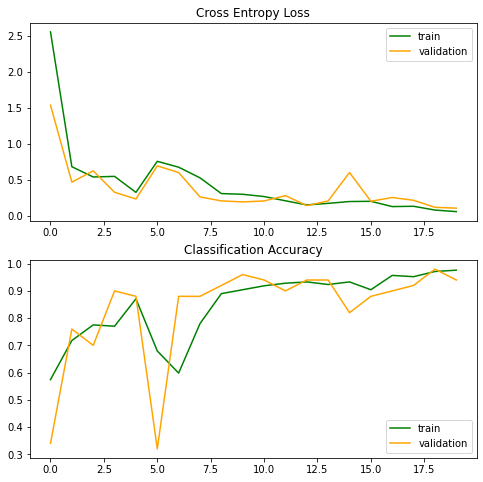

Model Performance (accuracy)
Train : 0.957
Test :  0.880


In [98]:
model = define_model()
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20)
summarize_model(history)

# Finalize and Save the model
Selected model : training last VGG block and Data Augmentation  
Finalize the model : fit the model with entire training set  
Save the model as .h5 

In [101]:
# create generator
datagen = ImageDataGenerator(featurewise_center=True, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, rotation_range=90)
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow(trainX, trainy, batch_size=32)

In [102]:
# define model
def define_model():
  # load vgg16
  model = VGG16(include_top=False, input_shape=(64,64,3), pooling='avg')
  # mark loaded layers as not trainable
  for layer in model.layers[:-5] :
    layer.trainable = False
    
  # add classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  fc1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  dropout1 = Dropout(0.2)(fc1)
  output = Dense(1, activation='sigmoid')(dropout1)

  # define model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [103]:
model = define_model()
model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=20)
# Save the Model
model.save('final_model.h5')

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 2.5047 - accuracy: 0.6699
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.3600 - accuracy: 0.8565
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.3204 - accuracy: 0.8995
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 1.2543 - accuracy: 0.8421
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.8846 - accuracy: 0.8134
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4475 - accuracy: 0.9139
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.1996 - accuracy: 0.9282
Epoch 8/20
7/7 [==============================] - 10s 1s/step - loss: 0.2005 - accuracy: 0.9234
Epoch 9/20
7/7 [==============================] - 10s 1s/step - loss: 0.2267 - accuracy: 0.9234
Epoch 10/20
7/7 [==============================] - 11s 2s/step - loss: 0.2140 - accuracy: 0.9522
Epoch 11/20
7/7 [======================

# Prediction
Make a prediction on a single image with the saved final model

In [104]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

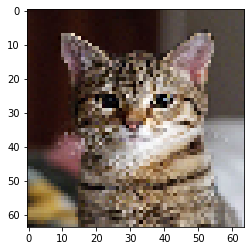

(64, 64, 3)


In [122]:
# load image
img = load_img('cat.jpg', target_size=(64, 64))
# plot image
plt.imshow(img)
plt.show()
# convert image to array
img = img_to_array(img)
print(img.shape)

In [123]:
# reshape image to single sample with 1 channel
sample = img.reshape(1,64,64,3)

# create generator without data augmentation
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
sample_it = datagen.flow(sample, batch_size=1)

# load model
model = load_model('final_model.h5')

# make prediction
result = model.predict(sample_it)
print('prediction : ', result[0])

prediction :  [0.37408584]
